<a href="https://colab.research.google.com/github/KanoonGammy/Data-Analytics-and-Data-Science-Tools-and-Programming/blob/main/HW_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/refs/heads/master/Week14-kmeans/Mall_Customers.csv")
display(data)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data = data.iloc[:,1:]
display(data)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
display(data)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [10]:
X = data.values
display(X.shape)

(200, 4)

In [45]:
range_n_cluster = range(2,11)
inertiaList = []
silhouetteList = []
seed = 1
for k in range_n_cluster:
    cluster = KMeans( n_clusters = k , random_state = seed)
    cluster.fit(X)

    inertiaList.append(np.round(cluster.inertia_,4))
    silhouetteList.append(np.round(silhouette_score(X, cluster.labels_), 4))

df = pd.DataFrame({"n_cluster": range_n_cluster ,"inertiaList": inertiaList, "silouette": silhouetteList})
display(df)

,n_cluster,inertiaList,silouette
0,2,225229.6122,0.3232
1,3,188601.2829,0.2794
2,4,104422.8350,0.4055
3,5,75399.6154,0.4441
4,6,68356.8269,0.4146
5,7,51573.2648,0.4348
6,8,53272.9647,0.4087
7,9,46504.4949,0.3957
8,10,43946.6696,0.3787


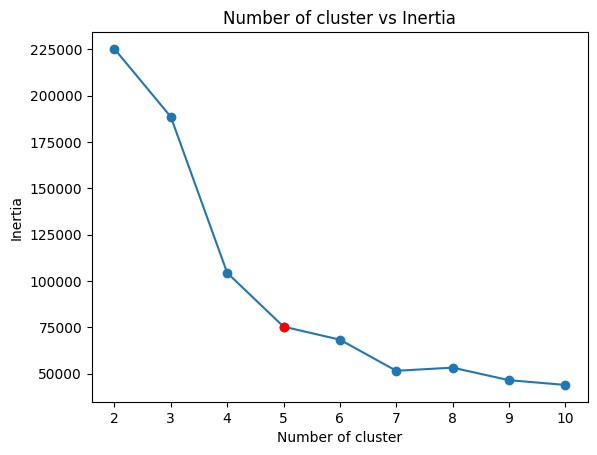

In [46]:
plt.plot(df["n_cluster"], df["inertiaList"], marker = "o", zorder = 1)
plt.scatter(df.loc[df["silouette"].idxmax(), "n_cluster"] , df.loc[df["silouette"].idxmax(), "inertiaList"], color = 'red',zorder = 1)
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title("Number of cluster vs Inertia")
plt.show()

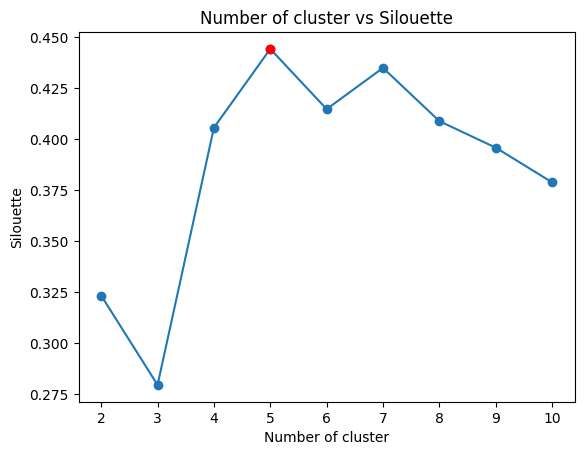

In [47]:
plt.plot(df["n_cluster"], df["silouette"], marker = "o", zorder = 1)
plt.scatter(df.loc[df["silouette"].idxmax(), "n_cluster"] , df.loc[df["silouette"].idxmax(), "silouette"], color = 'red',zorder = 1)
plt.xlabel("Number of cluster")
plt.ylabel("Silouette")
plt.title("Number of cluster vs Silouette")
plt.show()

In [48]:
n_cluster = df.loc[df["silouette"].idxmax(), "n_cluster"]
kmeans = KMeans( n_clusters = n_cluster , random_state = seed)
kmeans.fit(X)

y_means = kmeans.predict(X)
df_c_y = data.copy()
df_c_y["Cluster"] = y_means
display(df_c_y)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,1
197,1,32,126,74,3
198,1,32,137,18,1


In [57]:
display(kmeans.cluster_centers_.shape)
display(pd.DataFrame(kmeans.cluster_centers_, columns = df_c_y.columns[:-1]))
display(kmeans.cluster_centers_[:, 2])
display(kmeans.cluster_centers_[:, 3])

(5, 4)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.417722,43.088608,55.291139,49.569620
1,0.527778,40.666667,87.750000,17.583333
2,0.391304,25.521739,26.304348,78.565217
3,0.461538,32.692308,86.538462,82.128205
4,0.391304,45.217391,26.304348,20.913043


array([55.29113924, 87.75      , 26.30434783, 86.53846154, 26.30434783])

array([49.56962025, 17.58333333, 78.56521739, 82.12820513, 20.91304348])

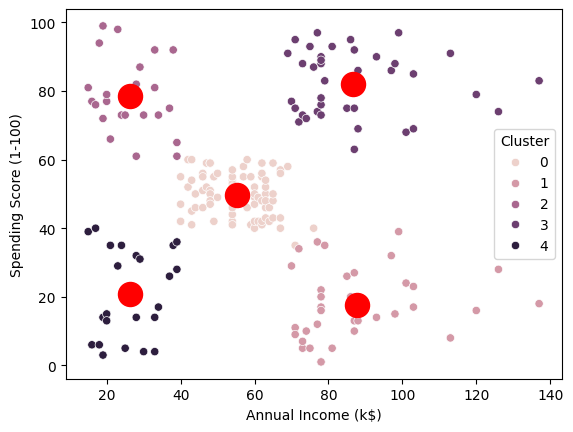

In [60]:
sns.scatterplot(data = df_c_y, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Cluster")
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'red', label = 'Centroids')
plt.show()